## **Incheon port data Online-PCA**

Include artificial ouliter data

- Inputs: Time-serise data (i.e., GC, TT, Temp)
- Outputs: Outlier score

writteny by seungsab (2022.11.15)
Edited bt taemin (2023.07.25)

In [1]:
import pandas as pd
import numpy as np
import scipy.io
import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
currentPath = os.getcwd()

print(currentPath)

C:\Users\USER\Desktop\Data\online_PCA


In [3]:
os.chdir("./content")

currentPath = os.getcwd()

print(currentPath)

C:\Users\USER\Desktop\Data\online_PCA\content


In [4]:

df_raw = pd.read_csv('J_Dataset_1101_0731_CA2_Def_1sig.csv')
df_raw.rename(columns = {'Time':'date'}, inplace=True)
# df_raw = pd.read_excel('data_11_months.xlsx')
# df_raw = df_raw.iloc[:,1:]S
# df_raw.rename(columns = {'Unnamed: 0':'date'}, inplace=True)

print(df_raw)
    
#plt.plot(df_PSD0.columns)

#plt.show()


                   date   CG_1      CG_2   CG_3   CG_4   TT_1   TT_2   TT_3  \
0       2022-11-01 0:00  0.000  0.000000  0.000  0.000  0.000  0.000  0.000   
1       2022-11-01 0:10  0.002 -0.003000  0.002  0.000  0.000  0.000  0.000   
2       2022-11-01 0:20  0.005 -0.005000  0.004  0.001 -0.001  0.000 -0.001   
3       2022-11-01 0:30  0.008 -0.007000  0.005  0.001 -0.001  0.000 -0.001   
4       2022-11-01 0:40  0.011 -0.009000  0.007  0.001 -0.001  0.000 -0.001   
...                 ...    ...       ...    ...    ...    ...    ...    ...   
38496  2023-07-31 23:10 -3.900  0.747501 -3.621  0.371  0.063  0.381  0.039   
38497  2023-07-31 23:20 -3.894  0.746501 -3.616  0.371  0.063  0.381  0.039   
38498  2023-07-31 23:30 -3.889  0.745501 -3.611  0.370  0.062  0.381  0.039   
38499  2023-07-31 23:40 -3.883  0.744501 -3.606  0.370  0.062  0.381  0.039   
38500  2023-07-31 23:50 -3.877  0.742501 -3.602  0.369  0.062  0.381  0.039   

        TT_4  TC_1_Avg  TC_2_Avg  Waterlevel  Label

In [5]:
# 월, 일(00시) 기준 인덱스 찾아주는 코드

df_raw['date'] = pd.to_datetime(df_raw['date'])

def find_date(yy, mon, day):
  for i in range(0,len(df_raw)):
    if df_raw.iloc[i,0].year == yy:
      if df_raw.iloc[i,0].month == mon: 
        if df_raw.iloc[i,0].day == day:
          X = i
          break
        else:
          continue
  return X

In [6]:
det_date1 = find_date(2022, 11, 1)
# det_date1 = 0

# 2022/10/1 00시 인덱스 찾기 테스트
print(det_date1)

0


In [7]:
# TT_2 && TT_4 초기 데이터(8월말 ~ 9월) 삭제

df_raw_tt = df_raw.iloc[det_date1:,:]
df_raw_tt.index = pd.RangeIndex(len(df_raw_tt)) #index reset
df_raw_tt


,date,CG_1,CG_2,CG_3,CG_4,TT_1,TT_2,TT_3,TT_4,TC_1_Avg,TC_2_Avg,Waterlevel,Label
0,2022-11-01 00:00:00,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,13.06,14.44,563,0
1,2022-11-01 00:10:00,0.002,-0.003000,0.002,0.000,0.000,0.000,0.000,0.000,13.07,14.56,543,0
2,2022-11-01 00:20:00,0.005,-0.005000,0.004,0.001,-0.001,0.000,-0.001,0.000,13.10,14.38,523,0
3,2022-11-01 00:30:00,0.008,-0.007000,0.005,0.001,-0.001,0.000,-0.001,-0.001,13.13,14.34,504,0
4,2022-11-01 00:40:00,0.011,-0.009000,0.007,0.001,-0.001,0.000,-0.001,-0.001,13.16,14.45,484,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38496,2023-07-31 23:10:00,-3.900,0.747501,-3.621,0.371,0.063,0.381,0.039,0.108,33.78,27.75,198,1
38497,2023-07-31 23:20:00,-3.894,0.746501,-3.616,0.371,0.063,0.381,0.039,0.108,33.66,27.91,221,1
38498,2023-07-31 23:30:00,-3.889,0.745501,-3.611,0.370,0.062,0.381,0.039,0.108,33.56,27.60,247,1
38499,2023-07-31 23:40:00,-3.883,0.744501,-3.606,0.370,0.062,0.381,0.039,0.108,33.46,27.44,274,1


In [8]:
# 월, 일(00시) 기준 인덱스 찾아주는 코드

df_raw_tt['date'] = pd.to_datetime(df_raw_tt['date'])

def find_date2(yy, mon, day):
  for i in range(0,len(df_raw_tt)):
    if df_raw_tt.iloc[i,0].year == yy:
      if df_raw_tt.iloc[i,0].month == mon: 
        if df_raw_tt.iloc[i,0].day == day:
          X = i
          break
        else:
          continue
  return X

In [9]:
# Date Label
point1 = find_date(2022, 11, 1)
point2 = find_date(2023, 1, 1)
point3 = find_date(2023, 3, 1)
point4 = find_date(2023, 5, 1)
point5 = find_date(2023, 7, 1)

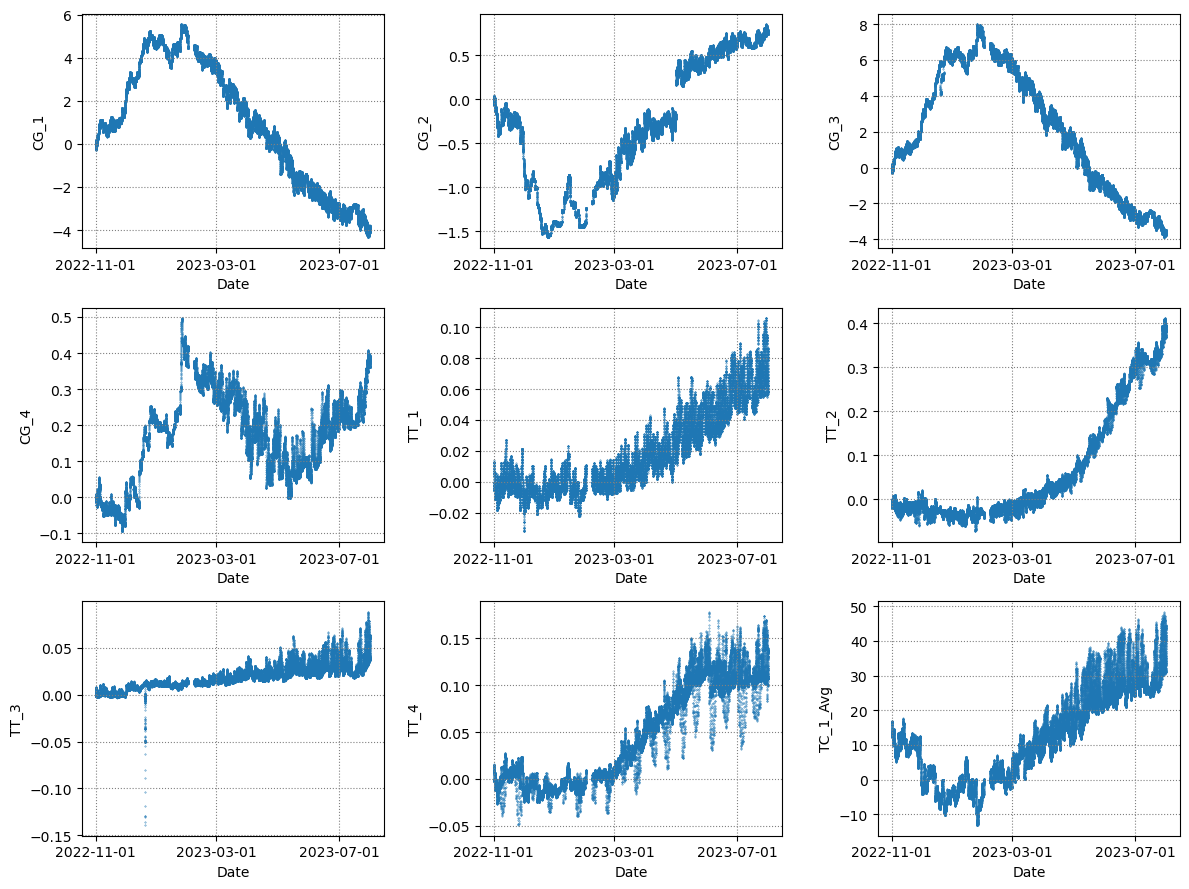

In [10]:
plt.figure(figsize=(12, 9))

for i in range(1,10):

  plt.subplot(3,3,i)
  plt.scatter(df_raw_tt.iloc[:,0],df_raw_tt.iloc[:,i], s=0.1)
  plt.xlabel('Date')
  plt.ylabel(df_raw_tt.columns[i])
  plt.xticks([df_raw_tt.iloc[point1, 0], df_raw_tt.iloc[point3, 0], df_raw_tt.iloc[point5, 0]])
  plt.grid(True, linestyle=':', color='gray')

plt.tight_layout()

plt.show()

In [11]:
# Training 부분 만들기 (index1 ~ index 2)
index1 = find_date2(2022, 11, 1)
index2 = find_date2(2023, 1, 1)

print(index1)
print(index2)

0
8784


In [14]:
outpoint = pd.DataFrame(columns=['data'])

CA = 1

if CA == 1:
    outpoint.loc[0] = find_date2(2023,5,1)
#     outpoint.loc[1] = find_date2(2023,6,1)
else:
    outpoint.loc[0] = find_date2(2023,5,1)


print(outpoint)

    data
0  25253


In [15]:
# df_raw_tt 행렬의 행 개수를 확인하여 행렬 생성
num_rows = df_raw_tt.shape[0]
df_label0 = pd.DataFrame(np.ones((num_rows, 1)), columns=['label'])

df_label0.iloc[index1:index2, :] = 0

print(df_label0)



       label
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
...      ...
38496    1.0
38497    1.0
38498    1.0
38499    1.0
38500    1.0

[38501 rows x 1 columns]


In [16]:
# select_columns = [1, 9]

if CA == 1:
    select_columns = [1, 2, 5, 6, 9]
else:
    select_columns = [3, 4, 7, 8, 9]

df_input = df_raw_tt.iloc[:, select_columns]

df_input

,CG_1,CG_2,TT_1,TT_2,TC_1_Avg
0,0.000,0.000000,0.000,0.000,13.06
1,0.002,-0.003000,0.000,0.000,13.07
2,0.005,-0.005000,-0.001,0.000,13.10
3,0.008,-0.007000,-0.001,0.000,13.13
4,0.011,-0.009000,-0.001,0.000,13.16
...,...,...,...,...,...
38496,-3.900,0.747501,0.063,0.381,33.78
38497,-3.894,0.746501,0.063,0.381,33.66
38498,-3.889,0.745501,0.062,0.381,33.56
38499,-3.883,0.744501,0.062,0.381,33.46


#### **Step #2: Split Train and Test datasets**

In [21]:
def run_all(train_ratio, df_label0, outpoint):
# Normal data
    bool_normal = (df_label0['label'] == 0)
    ind_train = int(df_input[bool_normal].shape[0] * train_ratio)

    # Split train and test datasets
    Xtrain, Ytrain = df_input.iloc[:ind_train, :], df_label0[:ind_train]
    Xvalid, Yvalid = df_input.iloc[ind_train:df_input[bool_normal].shape[0], :], df_label0[ind_train:df_input[bool_normal].shape[0]]
    Xtest, Ytest = df_input.iloc[df_input[bool_normal].shape[0]:, :], df_label0[df_input[bool_normal].shape[0]:]

    # Plotting
    plt.figure(figsize=(10, 8), dpi=200)
    plt.scatter(Ytrain.index, Ytrain.values, c='b', label='Train')
    plt.scatter(Yvalid.index, Yvalid.values, c='g', label='Valid')
    plt.scatter(Ytest.index, Ytest.values, c='r', label='Test')
    plt.grid(ls=':', color='gray')
    plt.xlabel('# Time Index')
    plt.ylabel('Train, Valid, Test')
    plt.legend()
    plt.show()

    # Define train and test data
    Xtrain_ = Xtrain.values
    Xvalid_ = Xvalid.values
    Xtest_ = Xtest.values

    from Utils.SS_Anomaly_Online_learning_out import pca_online

    anomaly_setting = {
        "method_Ncomp": 'eigengap',  # 'CPV' // 'eigengap'
        "alpha": 0.9999,
        "cutoff": 0.95,
        "component_use": 'minor',  # 'major' // 'minor'
        "method_thresh": 'threhold_from_Gaussian',  # percentile
        "gmm_run": True,  # True // False
        "score_type" : 'SPE' #SPE(Q) or else(t2)
    }

    Anomaly_detector = pca_online(**anomaly_setting)
    Anomaly_detector.fit_initial_pca(Xtrain_)

    for ind, x in enumerate(Xvalid_):
        print(f'Valid: {ind} // {Xvalid_.shape[0]}', end='\r')
        Xnew = x.reshape(1, -1)
        Anomaly_detector.fit_online_pca(Xnew)

    for ind, x in enumerate(Xtest_):
        print(f'Test: {ind} // {Xtest_.shape[0]}', end='\r')
        Xnew = x.reshape(1, -1)
        Anomaly_detector.fit_online_pca(Xnew)

    Anomaly_detector.plot_result(f'Training Ratio : {train_ratio * 100} %', df_label0, outpoint)



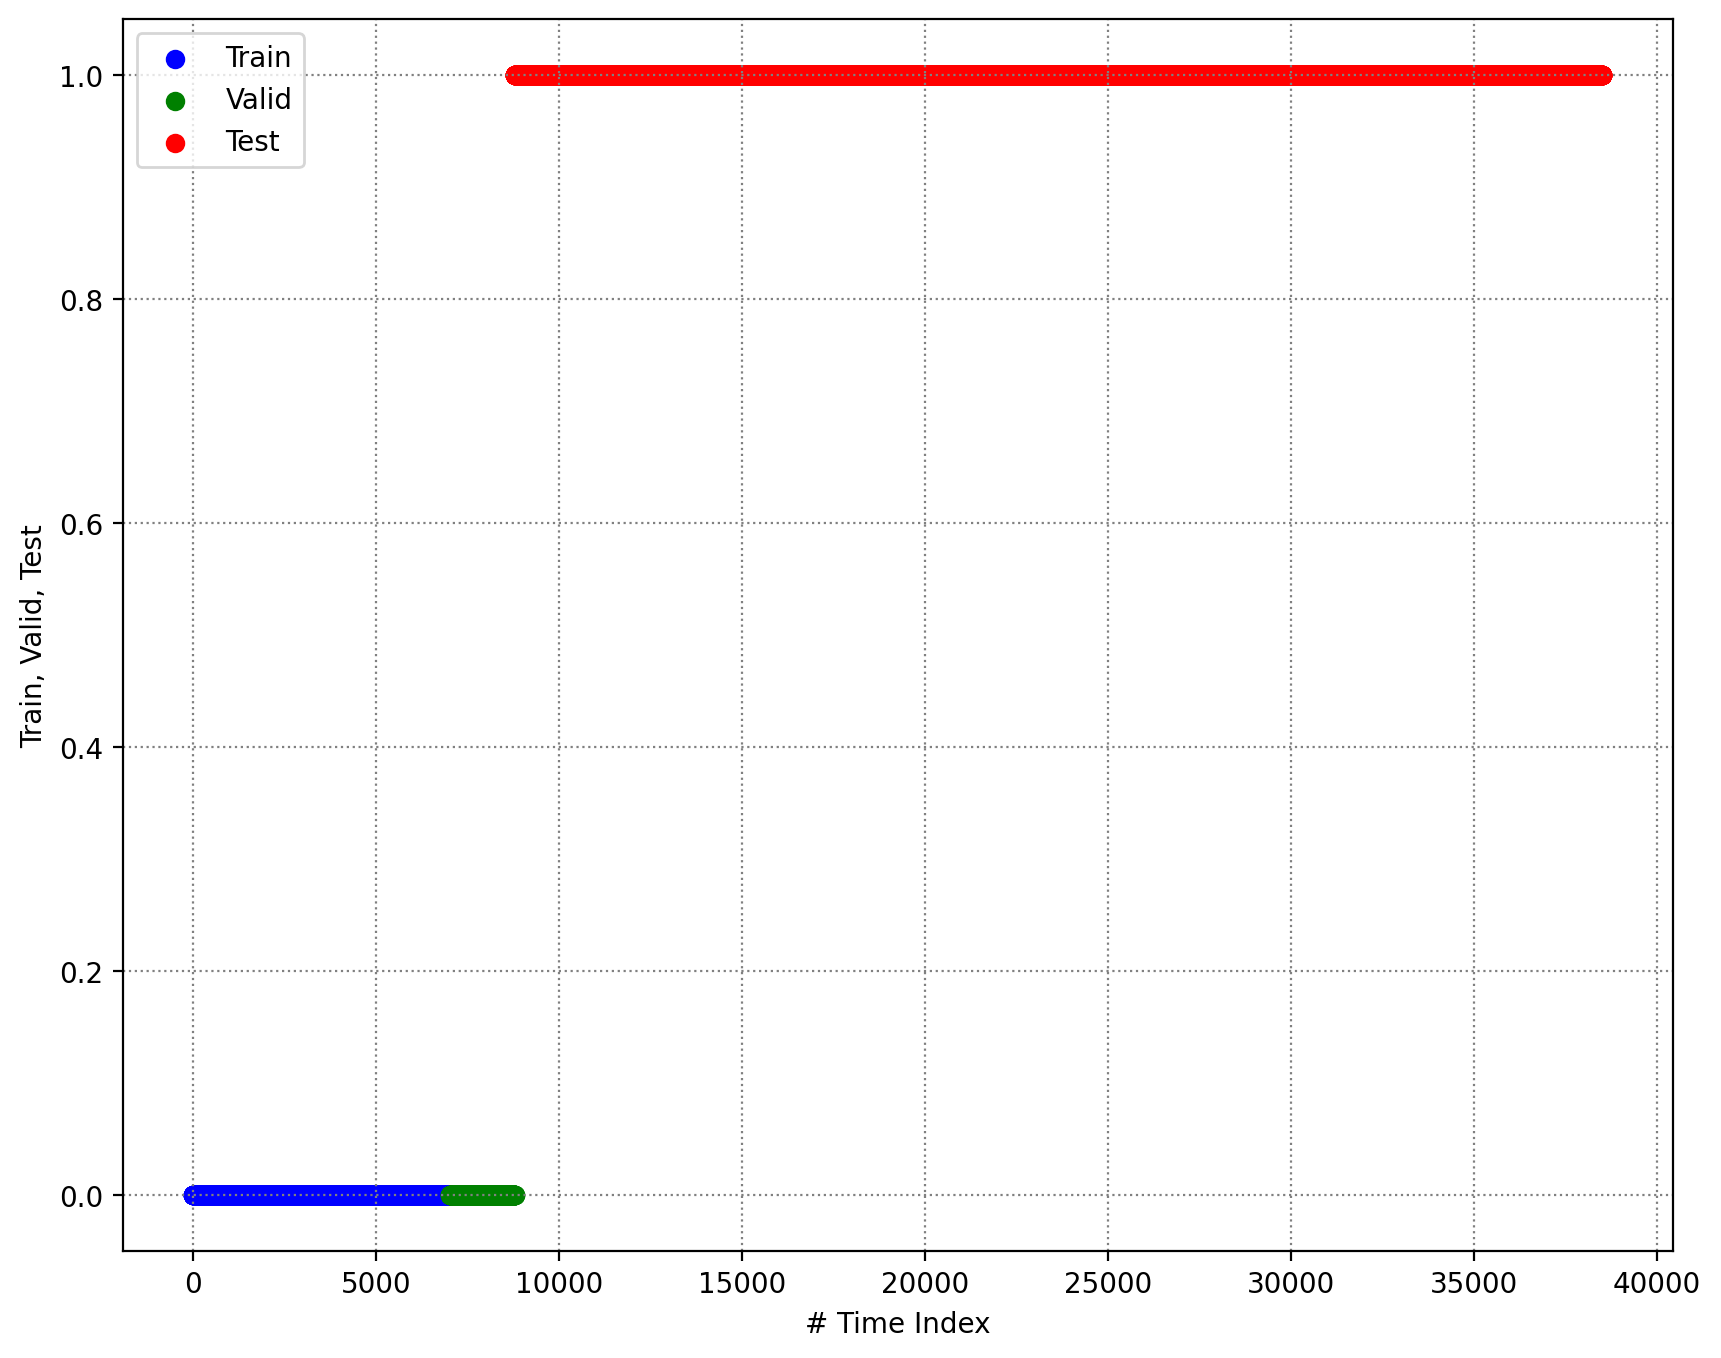

Number of abnormal points before out: 0
Number of abnormal points after out: 13201
Total number of points before out: 25252
Total number of points after out: 13248
Total number of points: 38501
Total number of abnormal points: 13201
False Positive Rate (오탐지율): 0.1220747513051609


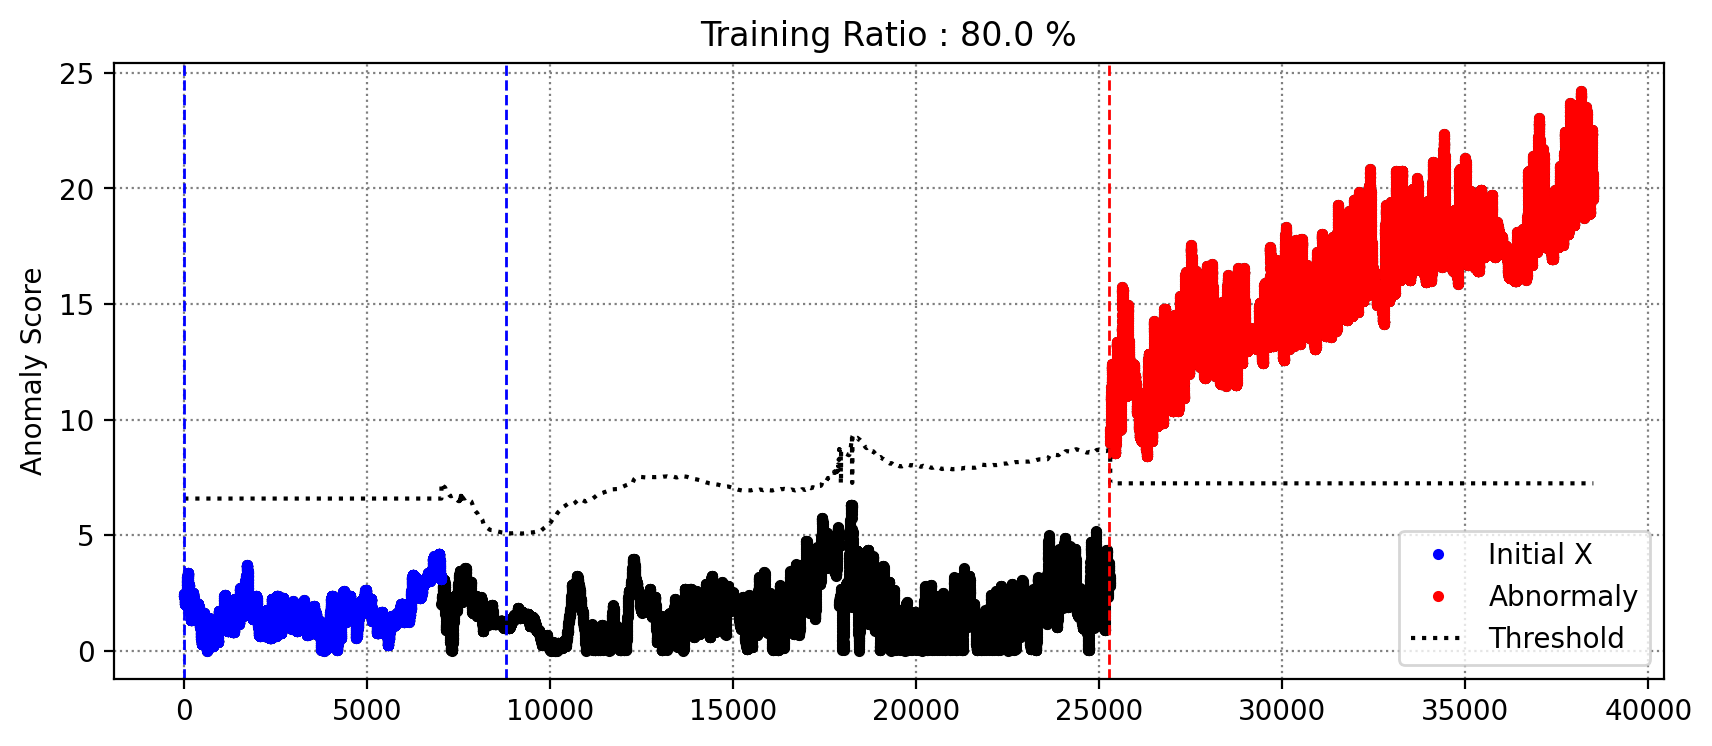

In [22]:
train_ratio = 0.8
run_all(train_ratio, df_label0, outpoint)

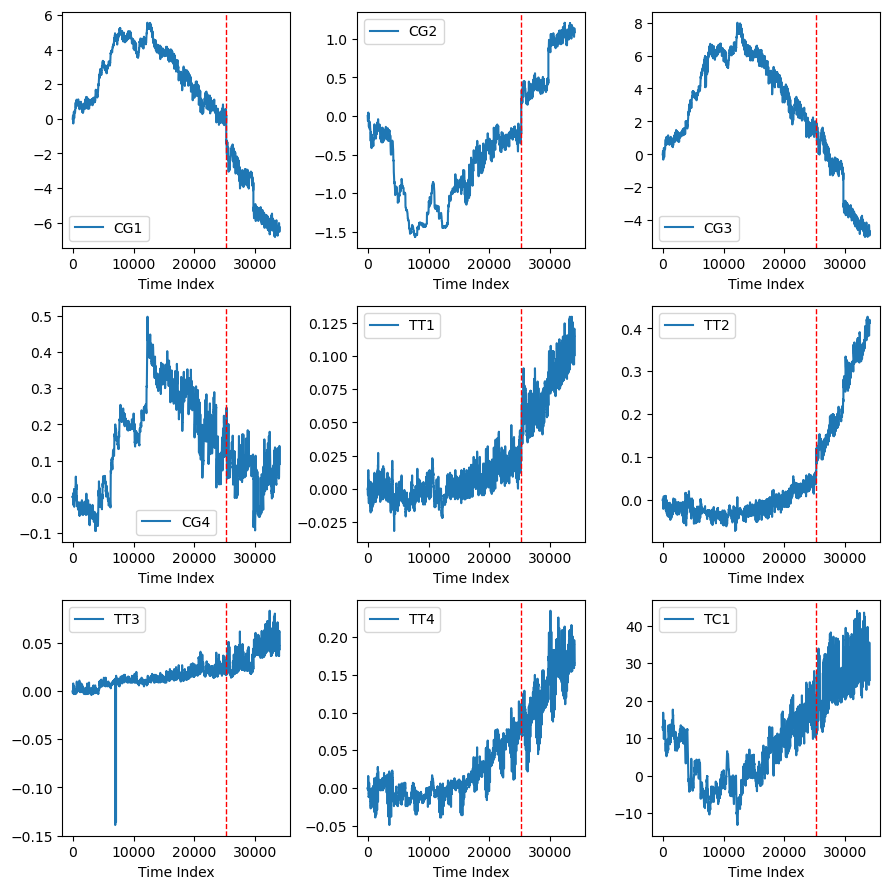

In [351]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))

# 전체 데이터 플롯
plt.subplot(3, 3, 1)
plt.plot(df_input.iloc[:, 0], label='CG1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 2)
plt.plot(df_input.iloc[:, 1], label='CG2')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 3)
plt.plot(df_input.iloc[:, 2], label='CG3')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 4)
plt.plot(df_input.iloc[:, 3], label='CG4')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 5)
plt.plot(df_input.iloc[:, 4], label='TT1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 6)
plt.plot(df_input.iloc[:, 5], label='TT2')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 7)
plt.plot(df_input.iloc[:, 6], label='TT3')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 8)
plt.plot(df_input.iloc[:, 7], label='TT4')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 9)
plt.plot(df_input.iloc[:, 8], label='TC1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
# plt.subplot(1, 3, 3)
# plt.plot(df_input.iloc[:, 2], label='TT1')
# plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
# plt.xlabel('Time Index')
# plt.legend()

plt.tight_layout()
plt.show()


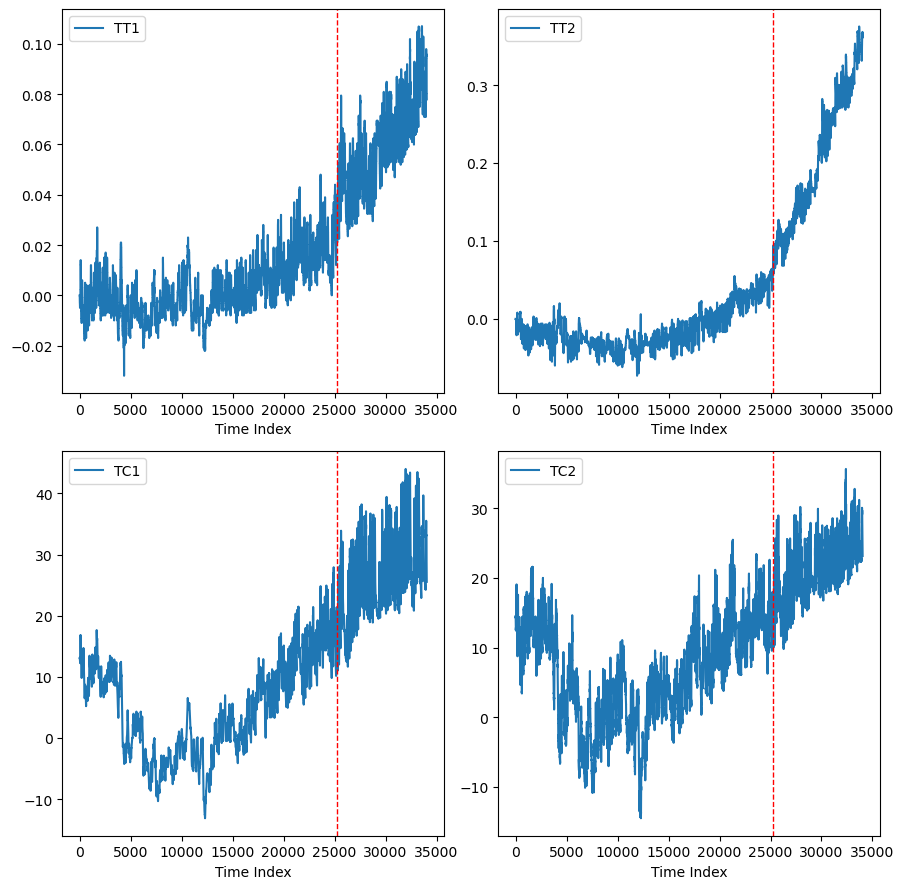

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))

# 전체 데이터 플롯
plt.subplot(2, 2, 1)
plt.plot(df_input.iloc[:, 0], label='TT1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(df_input.iloc[:, 1], label='TT2')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(df_input.iloc[:, 2], label='TC1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(df_input.iloc[:, 3], label='TC2')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()


plt.tight_layout()
plt.show()


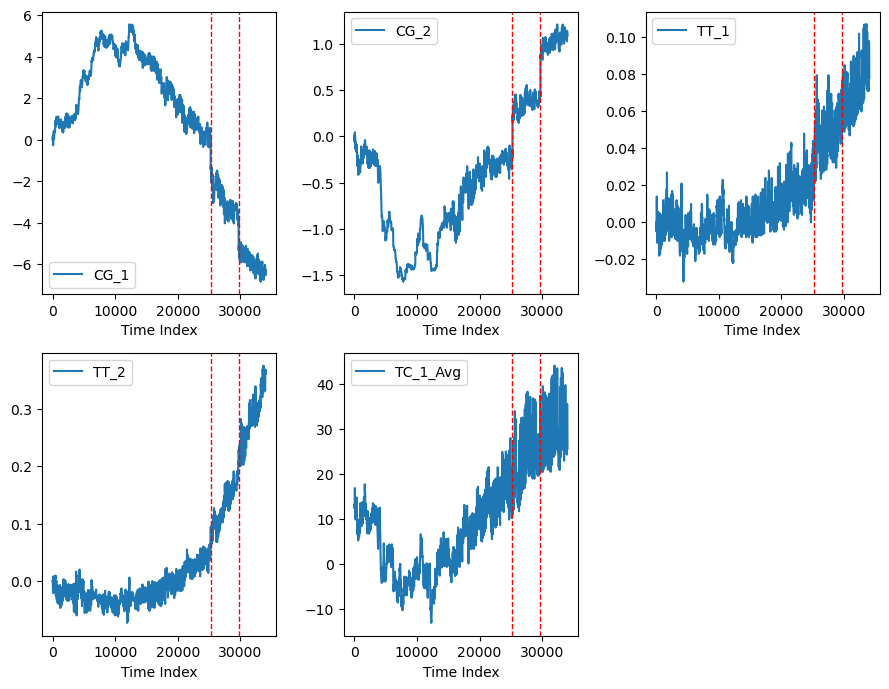

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))

# 전체 데이터 플롯
for i, column_name in enumerate(df_input.columns):
    plt.subplot(2, 3, i+1)
    plt.plot(df_input.iloc[:, i], label=column_name)
    if isinstance(outpoint, pd.DataFrame):
        for _, row in outpoint.iterrows():
            plt.axvline(x=row['data'], color='r', linestyle='--', linewidth=1)
    else:
        plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
    plt.xlabel('Time Index')
    plt.legend()

plt.tight_layout()
plt.show()


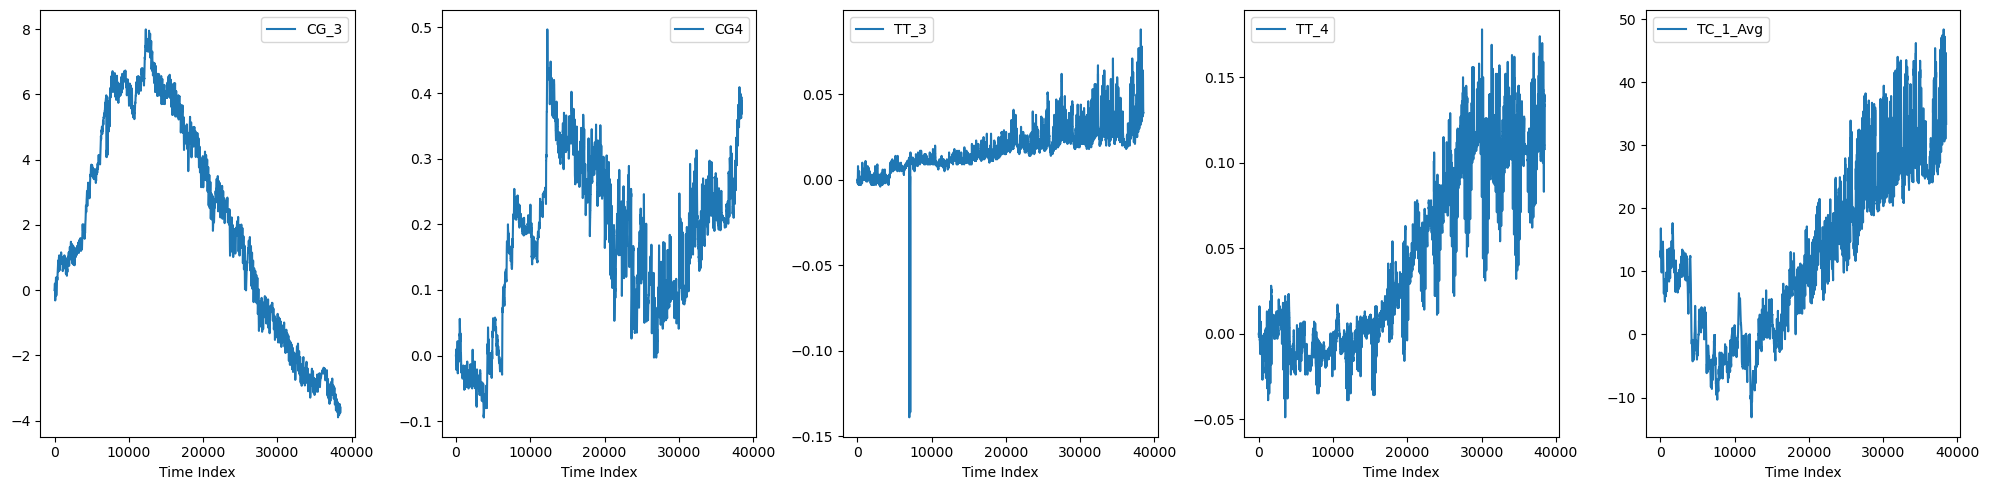

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

# 전체 데이터 플롯
for i, column_name in enumerate(df_input.columns):
    plt.subplot(1, 5, i+1)
    plt.plot(df_input.iloc[:, i], label=column_name)
    for _, row in outpoint.iterrows():
        plt.axvline(x=row['data'], color='r', linestyle='--', linewidth=1)
    plt.xlabel('Time Index')
    plt.legend()

plt.tight_layout()
plt.show()

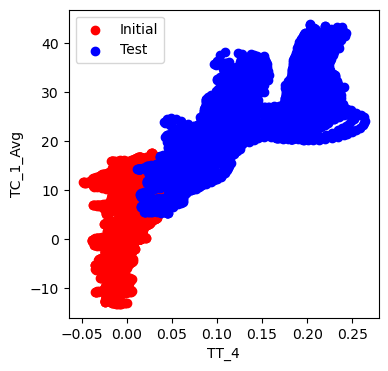

In [274]:
column_labels = df_input.columns.tolist()

plt.figure(figsize = (4,4))
plt.scatter(df_input.iloc[:index2, 0],df_input.iloc[:index2, 1], color ='r')
plt.scatter(df_input.iloc[index2:, 0],df_input.iloc[index2:, 1], color ='b')
plt.legend(labels=['Initial', 'Test'])
plt.xlabel(column_labels[0])
plt.ylabel(column_labels[1])
plt.show()



PC1 explained variance ratio: 0.9496501315806573


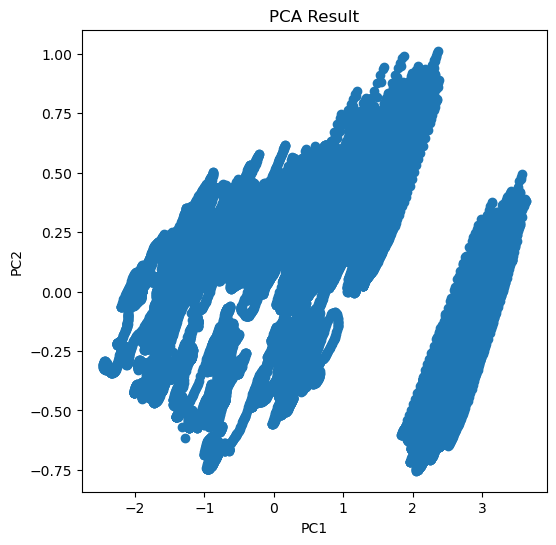

In [299]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = {
    'feature1': df_input.iloc[:,0],
    'feature2': df_input.iloc[:,1]
}

data_df = pd.DataFrame(data)

# 데이터 스케일링 (평균 0, 분산 1로 스케일링)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_df.iloc[:, :2])

# PCA 수행
pca = PCA(n_components=2)
pc_scores = pca.fit_transform(scaled_data)

# 주성분 PC1의 변동성 확인
print("PC1 explained variance ratio:", pca.explained_variance_ratio_[0])

# 결과 시각화
plt.figure(figsize=(6, 6))
plt.scatter(pc_scores[:, 0], pc_scores[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Result')
plt.show()